# Team Offensive Rating and Shooting in the NBA

This activity will explore how the NBA evolved from being a two point shooting league to a three point shooting one. The main criteria to evaluate if a team is really better with a three point shot is done through analyzing how FG%, eFG%, and TS% correlate with offensive rating. 


### Objective
If any of the shooting percentages increase, does that lead to an increase in offensive rating? If it does, then shooting matters for better offense!

### Terminology:
**FGM:** number field goals made

**FGA:** number field goals attempted

**3PM:** number 3-pointers made

**FG%:** is the ratio of the field goals made to the field goals attempted

<p style="text-align: center;">$FG\% = \frac{FGM}{FGA}$</p>

**eFG%:** is a weighted version of the FG%, which gives more weight to the 3-point shots since they are more difficult to make

<p style="text-align: center;">$eFG\% = \frac{FGM + 0.5 * 3PM}{FGA}$</p>

**TS%:** true shooting percentage; takes into account all types of shots (free throw, two pointer, three pointer)

<p style="text-align: center;">$TS\% = \frac{PTS}{2 * TSA}$</p>

**TP:** total possessions

For more terminology and explanation refer to: https://www.basketball-reference.com/about/glossary.html

## What is Offensive Rating?

Measures the offensive productivity, which is used to measure a team's offensive performance. Takes into account proints from and percentages of free throws, field goals, three pointers. Also considers offensive rebounds and turnovers. 

**Offensive rebounds** because that is a chance for the team to score again and continue a possession of a play.

**Turnovers** because it is a noisy measure of Offensive Rating, allowing for there to be no perfect correlation between shooting and Offensive Rating. If there were no turnovers, then all the shooting metrics would be perfectly correlated with one another. 

**Shooting** is important for Offensive Rating because when lower percentage shots are taken, shooting is more indicative of offensive rating. Notice, how the value of the shot doesn't matter; its more of the ability to make a shot than how much a shot it worth.  

### Intuition Behind Assignment:
Some ideas and the theory behind the game simulation are things I learned from my Sports Analytics class at UC Berkeley; taught by **Alex Papanicolaou**. 

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# calculates correlation between -1, 1:
from scipy.stats import pearsonr as _pearsonr
def correlation(x, y):
    rho = _pearsonr(x, y)[0]
    if np.isnan(rho):
        rho = 0.
    return rho

# simulates a coin flip with head probability p 
def coin_flip(p):
    return np.random.choice(2, p=[1 - p, p])

# Note: no other imports used during this notebook.

# Dataset and Processing
Can be found at Basketball Reference. There are numerous sites where NBA data is posted. 

In [2]:
data = pd.read_csv('nba_team_season_data.csv')
data.head(10)

# Note: more columns in the DataFrame don't matter. Those that are
# important are already discussed above. 

# ABA is the American Basketball Association–what the NBA was
# called before the NBA.

# Each row is a team in during a NBA or ABA season. 

,lg_id,wins,losses,rank_team,srs,pace,pace_rel,off_rtg,off_rtg_rel,def_rtg,...,opp_trb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,opp_pts,season,year,team
0,NBA,35.0,47.0,2.0,-1.47,110.8,3.0,97.7,0.0,99.0,...,3896.0,2028.0,823.0,388.0,1846.0,2128.0,9024.0,1973-74,1973,ATL
1,NBA,54.0,28.0,2.0,3.20,105.0,-2.8,96.7,-1.0,93.6,...,3870.0,1830.0,614.0,406.0,1880.0,2200.0,8097.0,1973-74,1973,CHI
2,NBA,29.0,53.0,4.0,-4.16,104.1,-3.7,96.0,-1.7,100.1,...,3939.0,2120.0,630.0,343.0,1654.0,1853.0,8576.0,1973-74,1973,CLE
3,ABA,37.0,47.0,5.0,-0.49,103.2,0.6,103.1,0.1,103.5,...,3955.0,2321.0,760.0,548.0,1417.0,2072.0,9032.0,1973-74,1973,DEN
4,NBA,52.0,30.0,3.0,4.02,106.5,-1.3,97.6,-0.1,93.8,...,3805.0,1980.0,772.0,410.0,1822.0,1996.0,8227.0,1973-74,1973,DET
5,NBA,44.0,38.0,2.0,2.42,108.9,1.1,100.8,3.1,98.4,...,3929.0,2027.0,714.0,465.0,1477.0,1826.0,8801.0,1973-74,1973,GSW
6,NBA,32.0,50.0,3.0,-0.34,106.1,-1.7,100.3,2.6,100.5,...,3781.0,2122.0,707.0,375.0,1737.0,1994.0,8821.0,1973-74,1973,HOU
7,ABA,45.0,39.0,3.0,0.74,95.0,-7.6,101.7,-1.3,100.8,...,3611.0,1764.0,601.0,409.0,1383.0,1970.0,8126.0,1973-74,1973,SAS
8,NBA,42.0,40.0,3.0,-0.19,111.6,3.8,99.3,1.6,99.4,...,4004.0,2256.0,798.0,435.0,1763.0,1992.0,9164.0,1973-74,1973,LAC
9,NBA,47.0,35.0,1.0,0.85,111.7,3.9,97.4,-0.3,96.6,...,4311.0,2061.0,797.0,430.0,1719.0,2135.0,8880.0,1973-74,1973,LAL


In [3]:
# rough calculation of total possessions
tp = data['fg2a'] + data['fg3a'].fillna(0) + data['tov'] + .4 * data['fta'] 

# Rates of free-throw, 2-pointer, 3-pointer, offensive rebound, turnover
data['ft_rate'] = .4 * data['fta'] / tp
data['fg2_rate'] = data['fg2a'] / tp
data['fg3_rate'] = data['fg3a'].fillna(0) / tp
data['oreb_rate'] = data['orb'] / (data['orb'] + data['opp_drb'])
data['tov_rate'] = data['tov'] / tp

# Shooting percents
data['fg_pct'] = data['fg'] / data['fga']
data['efg_pct'] = (data['fg'] + .5 * data['fg3'].fillna(0) ) / data['fga']
data['ts_pct'] = data['pts'] / (2 * (data['fga'] + .44 * data['fta']))

In [4]:
data.head()

,lg_id,wins,losses,rank_team,srs,pace,pace_rel,off_rtg,off_rtg_rel,def_rtg,...,season,year,team,ft_rate,fg2_rate,fg3_rate,oreb_rate,tov_rate,efg_pct,ts_pct
0,NBA,35.0,47.0,2.0,-1.47,110.8,3.0,97.7,0.0,99.0,...,1973-74,1973,ATL,0.086473,0.739453,0.000000,0.310466,0.174073,0.465134,0.509544
1,NBA,54.0,28.0,2.0,3.20,105.0,-2.8,96.7,-1.0,93.6,...,1973-74,1973,CHI,0.092619,0.738272,0.000000,0.294816,0.169108,0.446191,0.498323
2,NBA,29.0,53.0,4.0,-4.16,104.1,-3.7,96.0,-1.7,100.1,...,1973-74,1973,CLE,0.071219,0.774930,0.000000,0.312730,0.153851,0.439476,0.479710
3,ABA,37.0,47.0,5.0,-0.49,103.2,0.6,103.1,0.1,103.5,...,1973-74,1973,DEN,0.087117,0.740069,0.031168,0.348670,0.141646,0.448458,0.497111
4,NBA,52.0,30.0,3.0,4.02,106.5,-1.3,97.6,-0.1,93.8,...,1973-74,1973,DET,0.085335,0.740861,0.000000,0.313152,0.173804,0.459481,0.505482


# Over Time ....

Seeing how the ABA/NBA has changed by plotting distributions over the years. 

### FG3 Rate 
This is the percent of shots that are three point shots. 

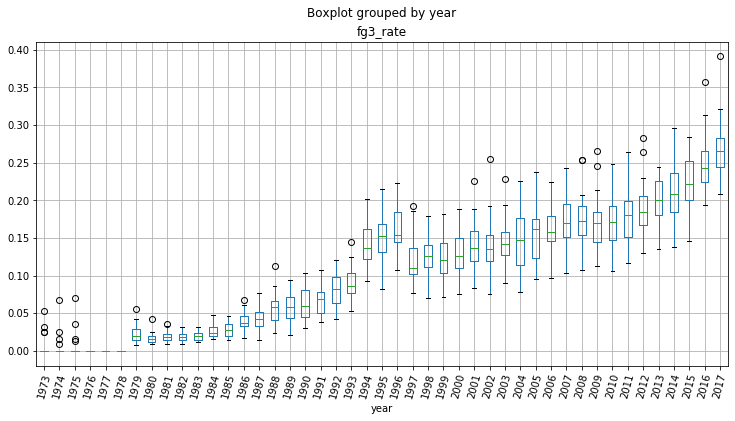

In [5]:
data.boxplot(column='fg3_rate', by='year', rot=75, figsize=(12, 6))
plt.show()

This is clearly evident in today's NBA game. There has been a significant increase in the number of three points in a game (thanks Steph Curry). 

### 3PT%
Accuracy on three point shots. 

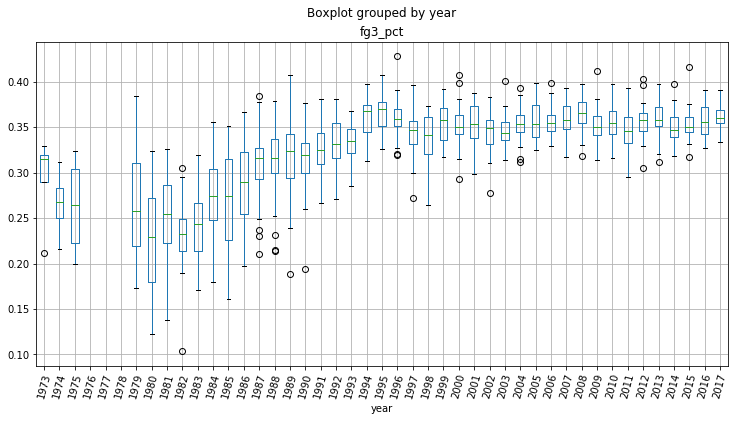

In [6]:
data.boxplot(column='fg3_pct', by='year', rot=75, figsize=(12, 6))
plt.show()

Teams are getting better at shooting the three pointer and have been steady since 1994. 

### Free Throw Rate

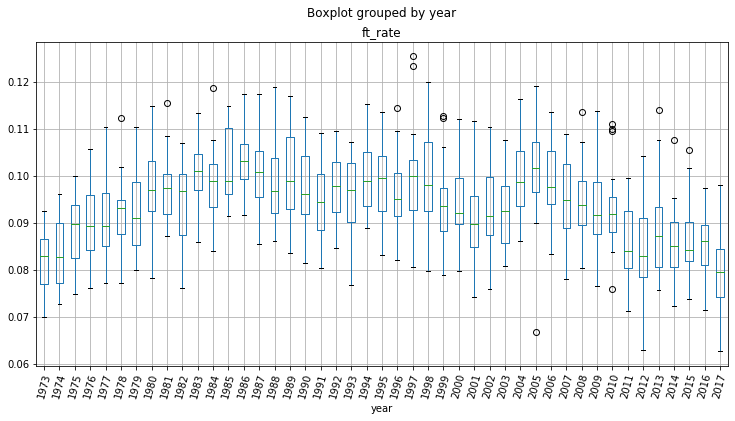

In [7]:
data.boxplot(column='ft_rate', by='year', rot=75, figsize=(12, 6))
plt.show()

Free throw percent is invariable over the years (but not for the Rockets)

### Turnover Rate

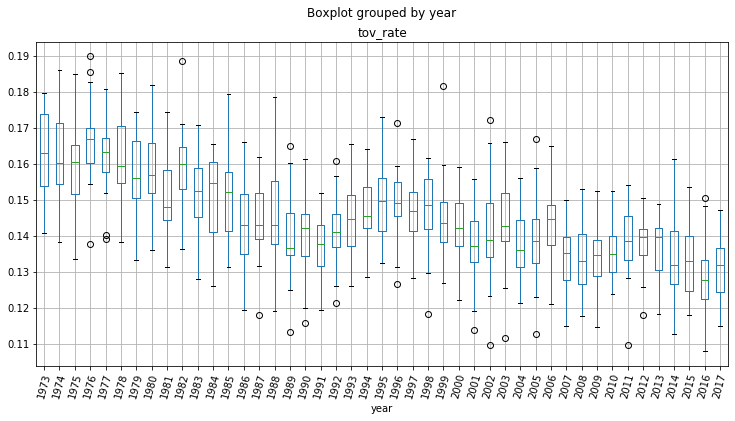

In [8]:
data.boxplot(column='tov_rate', by='year', rot=75, figsize=(12, 6))
plt.show()

Teams are becoming better at losing the ball less. 

### Offensive Rebound Rate

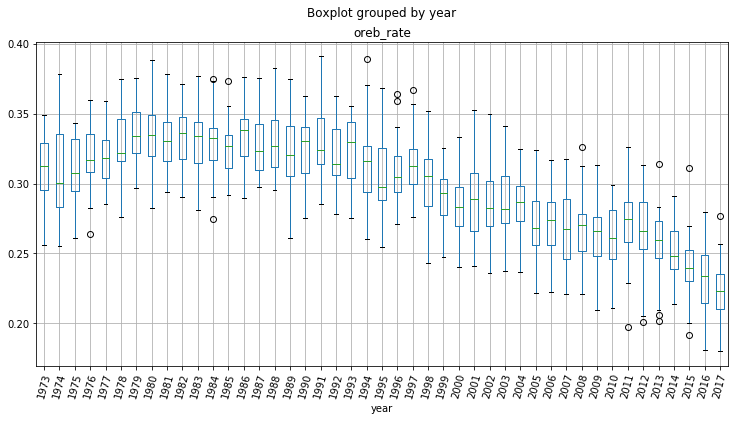

In [9]:
data.boxplot(column='oreb_rate', by='year', rot=75, figsize=(12, 6))
plt.show()

Teams are getting less and less rebounds, because they probably don't need to since there is an increase in shooting accuracy.

### True Shooting

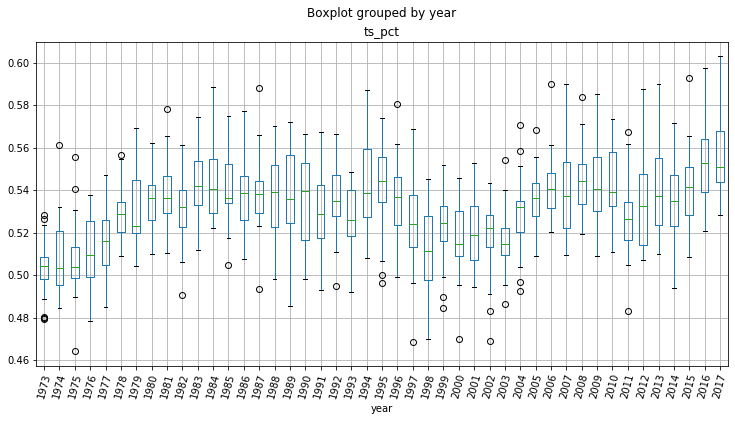

In [10]:
data.boxplot(column='ts_pct', by='year', rot=75, figsize=(12, 6))
plt.show()

Teams becoming slightly better at shooting recently. 

### Offensive Rating

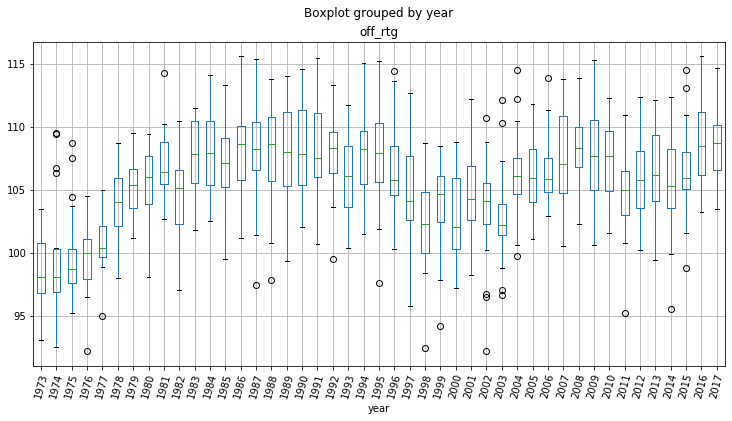

In [11]:
data.boxplot(column='off_rtg', by='year', rot=75, figsize=(12, 6))
plt.show()

Very similar pattern to true shooting percent. (Maybe they're correlated?)

### Conclusion:
There statistics are purely team statistics, not an individual player's statistics. Teams' offensive performance can be judged by the statistics above, but not an individual. However, it shows that if a team is composed of bad shooters or scorers, it can impact the team negatively solely based on the correlation between shooting percentages and offensive rating. 

# Correlation

Best way to understand the statistics and performance at a certain distance from the hoop is the data science way: by simulating! 

We need to simulate a possession based on scoring ability from a range. Then to simulate a game, we need to group results of many possessions. Then we can simulate many games to simulate an entire season.

Follow the comments below for context.

In [12]:
def sim_pos(performance):
    # Simulates one possession in a game
    # Probability of en event in performance
    prob = [performance['ft_rate'],
         performance['fg2_rate'],
         performance['fg3_rate'],
         performance['tov_rate']]
    # One of the above events occur with corresponding probability
    event = np.random.choice(['ft', 'fg2', 'fg3', 'tov'], p=prob)
    # Return the result of the event playing out
    return event_outcome(event, performance)
    
def freethrow(performance):
    # Returns outcome of two free throws
    return coin_flip(performance['ft_pct']) + coin_flip(performance['ft_pct'])

def two(performance):
    # Returns outcome of a two point shot
    return 2 * coin_flip(performance['fg2_pct'])

def three(performance):
    # Returns outcome of a three point shot
    return 3 * coin_flip(performance['fg3_pct'])
    
def event_outcome(event, performance):
    if event == 'ft':
        return event, freethrow(performance)
    if event == 'fg2':
        return event, two(performance)
    if event == 'fg3':
        return event, three(performance)
    else:
        # There is a turnover, hence no points
        return event, 0

In [13]:
def sim_game(performance, games=1):
    # Simulates a games number of game
    # Average 100 possessions per team in NBA game
    outcomes = []
    for i in np.arange(games * 100):
        event, points = sim_pos(performance)
        outcomes.append({'event': event, 'points': points})
    # turn outcomes into a DataFrame:
    game = pd.DataFrame(outcomes)
    return game

In [14]:
# Say your team is full of Steph Curries where you shoot
# 30% 2 pointers, 60% three pointers, turn the ball over 
# 5% of the time, and shoot free throws 5% of the time.

# A player has a 50% field goal percentage, 45% three point percentage
# and a 92% free throw percentage

# Then your performance is:
curries = pd.Series(
            [0.4, 0.5, 0.05, 0.05, .5, .45, .92],
        index=['fg2_rate', 'fg3_rate', 'ft_rate', 'tov_rate', 'fg2_pct', 'fg3_pct', 'ft_pct'])

curries

fg2_rate    0.40
fg3_rate    0.50
ft_rate     0.05
tov_rate    0.05
fg2_pct     0.50
fg3_pct     0.45
ft_pct      0.92
dtype: float64

In [15]:
# Simulating one game with a team full of Steph Curries
curry_game = sim_game(curries, 1)

# Make sense of the results, maybe change the percentages of curries
# above and see what's happening to the results. 
# Notice the free throws are pretty much always going in (if there
# even are any since they only occur 5% of the time)!
curry_game.head(20)

,event,points
0,fg3,0
1,fg3,3
2,fg3,0
3,fg3,0
4,fg3,0
5,fg2,0
6,fg2,2
7,ft,2
8,fg3,0
9,fg2,2


In [42]:
def game_results(performance, games=1):
    # Returns a dictionary of the shooting splits after simulating
    # a game
    results_table = sim_game(performance, games)
    
    # Results by play outcomes:
    ft = results_table[results_table['event'] == 'ft']
    fgs = results_table[results_table['event'].str.contains('fg')]
    fg3 = results_table[results_table['event'] == 'fg3']
    
    # Number in each play outcomes:
    ft_made = len(ft[ft['points'] != 0])
    fta = len(ft)
    fg_made = len(fgs[fgs['points'] != 0])
    fg3_made = len(fg3[fg3['points'] != 0])
    fga = len(fgs)
    total_points = sum(results_table['points'])
    
    # Shooting percentages:
    fg_per = fg_made/fga
    efg_per = (fg_made + 0.5 * fg3_made)/fga
    ts_per = total_points/(2 * (fga + 0.5 * fta))
    offensive_rate = total_points/games
    
    return {'fg%' : fg_per, 'efg%' : efg_per,
            'ts%' : ts_per, 'off_rat' : offensive_rate}

In [66]:
# Lets look at Curries team's shooting splits:
curry_results = game_results(curries, 1)

# Look at that baller offensive rating
def print_results(results):
    for i in results:
        print(str(i) + ': ' + str(results[i]))
    
print_results(curry_results)    
    
# Once I got an offensive rating of 138.
# Bet you can't get a higher offensive rating with Curries.

fg%: 0.47368421052631576
efg%: 0.5736842105263158
ts%: 0.5958549222797928
off_rat: 115.0


In [67]:
# classic simulation where a game is simulated a number of times
# returns the results of the simulation
def simulation(performance, n):
    results = []
    for _ in range(n):
        results.append(game_results(performance, 1))
    results_df = pd.DataFrame(results)
    return results_df[['fg%', 'efg%', 'ts%', 'off_rat']]

In [68]:
# Note: for this to work have at least 2 games simulated

def percent_correlations(results):
    fg_p = correlation(results['fg%'].values, results['off_rat'].values)
    print(f"FG% vs Off. Rating:  {fg_p:.3f}")
    efg_p = correlation(results['efg%'].values, results['off_rat'].values)
    print(f"eFG% vs Off. Rating: {efg_p:.3f}")
    ts_p = correlation(results['ts%'].values, results['off_rat'].values)
    print(f"TS% vs Off. Rating:  {ts_p:.3f}")

In [69]:
curry_simulation = simulation(curries, 1000)
percent_correlations(curry_simulation)

FG% vs Off. Rating:  0.929
eFG% vs Off. Rating: 0.965
TS% vs Off. Rating:  0.971


### Discover For Yourself
Try to create performance probability arrays and rates to see different correlations given the above formulas. 

In [47]:
# helpful function to help create performances:
def perf(fg2_rate, fg3_rate, ft_rate, tov_rate, fg2_pct, fg3_pct, ft_pct):
    return pd.Series({
            'fg2_rate': fg2_rate, 
            'fg3_rate': fg3_rate,
            'ft_rate': ft_rate,
            'tov_rate': tov_rate,
            'fg2_pct': fg2_pct, 
            'fg3_pct': fg3_pct,
            'ft_pct': ft_pct
            })

#### Example:
What happens to the correlations when the 2-point shot is guaranteed to go in?

In [49]:
guaranteed2 = perf(0.85, 0, 0, 0.15, 1., 0., 0.75)
percent_correlations(simulation(guaranteed2, 1000))

FG% vs Off. Rating:  0.000
eFG% vs Off. Rating: 0.000
TS% vs Off. Rating:  0.000


They are not correlated at all....

#### Try different performances based on your interests...

Here are some ideas:
1. Make the 3-pt shot guaranteed
2. Change the percent of threes and twos or make them equal
3. Score only using free throws
4. Have a very high turnover rate
5. Be James Harden: only threes and free throws

# Conclusion
In this notebook:
1. You were able to learn how the NBA has changed over time. 
2. You learned to simulate the offense in an NBA game based on a limited set of in-game statistics 
3. You customized the offense of an NBA game by your interests.
4. You learned something about the correlation between shooting and offensive rating.

Hopefully, as an NBA fan, you enjoyed learning about the NBA and analyzing team data! If you're not an NBA fan, I hope you took away something meaningful about time-series analysis and simulations!